In [72]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


1.) Introduction 

The objective of this project is to analyse an Amazon dataset comprising of more than a thousand products and features. The aim is to identify important relationships between variables that can provide valuable insights to increase sales and enhance customer satisfaction.

The project involves four critical stages: data cleaning, feature engineering, univariate analysis, and data visualisation. By processing and analysing the raw data, retailers on the amazon market can gain a better understanding of which products are popular and profitable and which ones are not.

In [73]:
# Import the necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Load the dataset unto pandas dataframe

df = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

2.) Data Cleaning

The dataset may contain errors, so it is necessary to clean it to achieve the best possible outcomes.This step involves identifying and correcting errors, inconsistencies, and inaccuracy 
in the dataset. The proceedure involves various activities such as removing duplicate records, filling in missing data, dealing with outliers, and standardising data format. Additionally, data cleaning is crucial as it lowers the probability of bias creeping into the analysis.

In [76]:
# 2.1) Drop columns which can be considered irrelevant to analysing the results.
# As the project is limited to analysing the data, certain categorical columns would be removed and stored in a new dataframe(df1) as follows:

df1 = df[['product_id', 'product_name', 'category', 'discounted_price','actual_price', 'discount_percentage', 'rating',#'about_product',
    'rating_count', # 'user_id','review_id', 'review_title','review_content', 'img_link', 'product_link', 'review_title'
     'user_name'
]]

df1.sample(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_name
723,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,"Electronics|HomeTheater,TV&Video|Televisions|S...","₹13,490","₹22,900",41%,4.3,"16,299","Rahman Ali,MARIYA DASS,Md Aftab,roshan s.,Moha..."
1070,B0BGPN4GGH,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,099","₹2,400",54%,3.8,4,"Avi kaur,Bhatia,ayonao"
852,B00NH11KIK,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,Computers&Accessories|Accessories&Peripherals|...,₹209,₹695,70%,4.5,"1,07,686","Shiva,Uzef,kottala samuel,Renjith,Dhivakaran,M..."
944,B08WKFSN84,Wayona Type C To Type C 65W/3.25A Nylon Braide...,Computers&Accessories|Accessories&Peripherals|...,₹379,"₹1,099",66%,4.3,"2,806","sameer Dubey,virender,Amazon Customer,Jay,Sidd..."
295,B08XXF5V6G,Kodak 139 cm (55 inches) 4K Ultra HD Smart LED...,"Electronics|HomeTheater,TV&Video|Televisions|S...","₹29,999","₹50,999",41%,4.4,"1,712","Abhijit Mukherjee,Swetha vijay,Soumya,Srinath,..."


In [77]:
df1.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
user_name              object
dtype: object

Observing from the code above, it is apparent that all the columns are currently in the object data type. It is necessary to convert the numerical columns into their appropriate datatypes.

In [78]:
# 2.2) Reformatting the datatypes of the various columns.

# 'discounted_price' - float dtype
df1['discounted_price'] = df1['discounted_price'].str.replace('₹','').str.replace(',','')
df1['discounted_price'] = pd.to_numeric(df1['discounted_price'])
df1['discounted_price']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

In [79]:
# actual_price - float dtype
df1['actual_price'] = df1['actual_price'].str.replace('₹','').str.replace(',','')
df1['actual_price'] = pd.to_numeric(df1['actual_price'])
df1['actual_price']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1465, dtype: float64

In [80]:
# discount_percentage - int dtype
df1['discount_percentage'] = df1['discount_percentage'].str.replace('%','')
df1['discount_percentage'] = pd.to_numeric(df1['discount_percentage'])
df1['discount_percentage']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1465, dtype: int64

In [81]:
# actual_price - float dtype
df1['rating'] = pd.to_numeric(df1['rating'], errors= 'coerce')
df1['rating']

# There is  an unexpected value error present in the rating column - '|'
# Use the coerce function to convert all unusual values to 'NaN' 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1465, dtype: float64

In [82]:

df1.loc[df1['rating'].isnull()]
# As only one value in the 'rating' column is missing, It would make no sense to delete the entire row. Thus, fill NaN value with the mode value of the rating column.


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_name
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,NaN,992,"Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P..."


In [83]:
df1['rating'] = df1['rating'].fillna(df1['rating'].mode()[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df1['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 2. , 2.6, 2.9])

In [85]:
# rating_count
df1['rating_count'] = df1['rating_count'].str.replace(',','')
df1['rating_count'] = pd.to_numeric(df1['rating_count'])
df1['rating_count']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       24269.0
1       43994.0
2        7928.0
3       94363.0
4       16905.0
         ...   
1460     1090.0
1461     4118.0
1462      468.0
1463     8031.0
1464     6987.0
Name: rating_count, Length: 1465, dtype: float64

# Look for duplicated values - 
Removing duplicate values in a dataset is an essemtial step in data cleaning as Duplicate values can lead to inaccurate results in data analysis. If two identical records are in the dataset, it would result in double-ccounting of certain values, which can distort your analysis and lead to incorrect conclusions.
Having duplicates in the dataset also increases the size of the dataset and thus needs more storage space and memory during processing. Removing duplicates can help reduce the size of the dataset , thus making it easier to work with and more efficient to analyse.

In [86]:
# 2.3) Remove duplicated rows.
df1.duplicated().value_counts()

# There are 76 instances whereby the data is duplicated, Let's investigate the reason why.

False    1389
True       76
dtype: int64

In [87]:
print("There are", df1.duplicated().sum(), "instances where the data is duplicated")

There are 76 instances where the data is duplicated


In [88]:
# View where the duplicated rows exist.
df1.loc[df1.duplicated()].head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_name
393,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
422,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.0,299.0,23,4.3,30411.0,"Pavan A H,Jayesh bagad,Shridhar,rajendran,karu..."
423,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,299.0,33,4.0,43994.0,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
428,B08CF3D7QR,Portronics Konnect L POR-1081 Fast Charging 3A...,Computers&Accessories|Accessories&Peripherals|...,154.0,339.0,55,4.3,13391.0,"Tanya,Anu,Akshay,Vishal Sagara Shetty,Swatilek..."
456,B09KLVMZ3B,Portronics Konnect L 1.2M POR-1401 Fast Chargi...,Computers&Accessories|Accessories&Peripherals|...,159.0,399.0,60,4.1,4768.0,"Deepaak Singh,siva k.,MUNDATH BALGOPAL,BOOPATH..."
464,B083342NKJ,MI Braided USB Type-C Cable for Charging Adapt...,Computers&Accessories|Accessories&Peripherals|...,349.0,399.0,13,4.4,18757.0,"Birendra ku Dash,Aditya Gupta,Abdulla A N,Deep..."
467,B09C6HXFC1,Duracell USB Lightning Apple Certified (Mfi) B...,Computers&Accessories|Accessories&Peripherals|...,970.0,1799.0,46,4.5,815.0,"Prasannavijayaraghavan G.,Preet Sikka,Theeban ..."
470,B082LSVT4B,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,249.0,399.0,38,4.0,43994.0,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
504,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,Computers&Accessories|Accessories&Peripherals|...,970.0,1999.0,51,4.4,184.0,"Amazon Customer,Govind Gujarathi,Vihari,shalem..."
518,B07XLCFSSN,Amazonbasics Nylon Braided Usb-C To Lightning ...,Computers&Accessories|Accessories&Peripherals|...,899.0,1900.0,53,4.4,13552.0,"Wraith,Krishna Engineering,Kindle Customer,Dee..."


There may be cases where we only care about duplicates in a certain subset of columns, such as in the case of the product_name column. In this case, we only care about identifying products with the same name, regardless of other attributes or characteristics that may differ between the rows of the DataFrame.

Using a subset of the DataFrame to look for duplicates can also help to avoid false positives, where two rows may have identical values in some columns, but not in others. By specifying a subset of columns to check for duplicates, we can ensure that only rows with identical values in those columns are considered duplicates.

In [89]:

df1.loc[df1.duplicated(subset= ['product_name'])]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_name
290,B09TY4MSH3,Firestick Remote,"Electronics|HomeTheater,TV&Video|Accessories|R...",1289.0,2499.0,48,3.3,73.0,"Harish Thirunahari,Gajanan Hirde,Tomi breeze,v..."
296,B09HK9JH4F,"Smashtronics® - Case for Firetv Remote, Fire S...","Electronics|HomeTheater,TV&Video|Accessories|R...",199.0,399.0,50,4.2,1335.0,"Princey,Subodh Gupta,Amazon Customer,Ram Sarik..."
364,B0BF54972T,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91,4.2,13937.0,"venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku..."
368,B0BF563HB4,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91,4.2,13937.0,"venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku..."
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24270.0,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
...,...,...,...,...,...,...,...,...,...
1007,B0B9BXKBC7,"WeCool S5 Long Selfie Stick, with Large Reinfo...",Electronics|Mobiles&Accessories|MobileAccessor...,1799.0,3999.0,55,4.6,245.0,"Sujili v,Paras Jain,Shailendra,supreeth achar,..."
1010,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,Computers&Accessories|Accessories&Peripherals|...,325.0,1299.0,75,4.2,10576.0,"Sunil Funde,Biju Abraham Thomas,Samir,Rahul Sh..."
1017,B0B9BD2YL4,KINGONE Wireless Charging Pencil (2nd Generati...,Electronics|Mobiles&Accessories|MobileAccessor...,2599.0,6999.0,63,4.5,1526.0,"Ak,Jitesh,anil,Umpo,G'DAS ENTERPRISES,Neetu,Va..."
1018,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,4.5,127.0,"Nadhiyarasan,Saurabh Aggarwal,Dibya,Sai Sriya,..."


In [90]:
print(df1.duplicated(subset= ['product_name']).sum())

128


In [91]:
# Looking at duplicated roles by the product_name subset shows a larger quantity of duplicated rows in the dataset. Use the query method to investigate the possible reasons.

df1.query('product_name == "Firestick Remote"')
# The duplicate rows occur because different retailers sold similar products and offered different prices as well as discounts 


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_name
79,B0BCZCQTJX,Firestick Remote,"Electronics|HomeTheater,TV&Video|Accessories|R...",1434.0,3999.0,64,4.0,32.0,"Dharminder Singh Singha,Gnana Prasad Gopathi,a..."
290,B09TY4MSH3,Firestick Remote,"Electronics|HomeTheater,TV&Video|Accessories|R...",1289.0,2499.0,48,3.3,73.0,"Harish Thirunahari,Gajanan Hirde,Tomi breeze,v..."


In [92]:
# Remove duplicate rows by locating columns where the values are not duplicates of the subsets

df2 = df1.loc[~df1.duplicated(subset= ['product_name','discounted_price','actual_price','rating'])] \
        .reset_index(drop = True)

# Using the subset function to remove duplicated rows is important because some rows may appear duplicated
# because further discounts were run on the similar products and thus altering the actual price.
# Such detail is valuable and is not removed from the dataset.

df2.shape


(1344, 9)

Upon examining the product named Firestick Remote, it is apparent that there exist discrepancies between its Actual_Price, Discount_Price, and User_Name. These discrepancies can likely be attributed to the fact that various retailers have sold the same product under the same name.

In [93]:
df2.duplicated().sum()

0

In [94]:
# 2.4) Deal with missing values

df2.isnull().sum()
# The only column with missing data is 'rating_count'
# The missing data is not significant enough to warrant dropping the entire row, so we will instead fill in the missing values with the mean value of their respective columns using the fillna method.

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
user_name              0
dtype: int64

In [95]:
# The 'rating_count' column has 2 null values, replace null values with mean count
df2['rating_count'] = df2['rating_count'].fillna(df2['rating_count'].mean())

In [96]:
df2.isnull().sum()
# There are no more empty columns as seen below.

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
user_name              0
dtype: int64

3) Feature Engineering

The Category column contains concatenated strings of multiple categories, and it is crucial to extract the main and last sub categories from it to obtain a more accurate and concise representation of the distribution of our products across various categories. Identifying the main category allows us to comprehend the overall classification of the product, while the sub category provides more specific information about the product.

Consider a product categorized under "Smartphones" which falls under the larger category of "Electronics". Understanding this hierarchy of categories can aid in analyzing the distribution of products and recognizing trends and patterns within particular categories. - FLAVIO QUARESMA (kaggle):https://www.kaggle.com/code/flavioquaresma/amazon-product-analysis-recommendation-system

In [97]:
# 3.1) feature engineering (Introducing sub categories).

df2['main_division'] = df2['category'].astype(str).str.split('|').str[0]
df2['sub_division'] = df2['category'].astype(str).str.split('|').str[-1]


In [98]:
# 3.2) Rename column titles
df2 = df2.rename(columns={'product_id': 'Product_Id','product_name': 'Product_Name', 'category': 'Category', 
                          'discounted_price': 'Discounted_Price','actual_price': 'Actual_Price',
                         'discount_percentage': 'Discount_Percentage', 'rating': 'Rating',
                          'rating_count': 'Rating_Count', 'user_id' : 'User_ID', 
                          'user_name':'User_Name', 'main_division' : 'Main_Division',
                          'sub_division' : 'Sub_Division'}, inplace = False)

In [99]:
df2['Main_Division'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [100]:
# 3.3) Reformat the title descripion for groups in the Main_Division column. 
df2['Main_Division'] = df2['Main_Division'].str.replace('&', ' & ') 
df2['Main_Division'] = df2['Main_Division'].str.replace('Instruments', ' Instruments ') 
df2['Main_Division'] = df2['Main_Division'].str.replace('Office', ' Office ') 
df2['Main_Division'] = df2['Main_Division'].str.replace('Products', ' Products ')
df2['Main_Division'] = df2['Main_Division'].str.replace('Improvement', ' Improvement ') 


In [101]:
df2.columns

Index(['Product_Id', 'Product_Name', 'Category', 'Discounted_Price',
       'Actual_Price', 'Discount_Percentage', 'Rating', 'Rating_Count',
       'User_Name', 'Main_Division', 'Sub_Division'],
      dtype='object')

In [102]:
df2.dtypes

Product_Id              object
Product_Name            object
Category                object
Discounted_Price       float64
Actual_Price           float64
Discount_Percentage      int64
Rating                 float64
Rating_Count           float64
User_Name               object
Main_Division           object
Sub_Division            object
dtype: object

In [103]:
#3.4) Check for outliers in the dataset.

df2.describe()
# Outliers will be identified in the univariate analysis section where graphical representations will be well suited to explain varying trends.

,Discounted_Price,Actual_Price,Discount_Percentage,Rating,Rating_Count
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,3273.998638,5597.751205,46.630208,4.090997,17700.121461
std,7165.966772,11188.251434,21.548767,0.298171,42342.304688
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,349.000000,899.000000,31.000000,3.900000,1095.750000
50%,889.000000,1749.500000,49.000000,4.100000,4729.500000
75%,2099.000000,4491.250000,62.000000,4.300000,15982.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


 4) Exploratory data analysis/ Univariate analysis -
 
 This is a statistical method used to analysis one variable at a time. It is an essential step in data analysis for several reasons:
 
     1. Data Summarisation: The process allows us to summarise and describe the characteristics of a single variable in  the dataset. It provides an enhanced understanding of the distribution, central tendency, and dispersion of the data  which aids in further analysis.
 
     2. Data Cleaning: Univariate analysis can help in identifying potential errors and anomalies in the dataset.By examining the distribution of the variable , we can identify outliers.
 
     3. Hypothesis testing: Univariate analysis is often used to test hypotheses about single variable.For example, we can use univariate analysis to test whether the mean of a variable is significantly different from a known value or whether the data follows a particular distribution.
 
     4. Data visualisation: Univariate analysis can be used to create visualisations such as histograms, box plots, and bar charts. These visualisations provide a graphical representation of the data, which can help in identifying patterns and trends.
 
     5. Variable selection: Finally, univariate analysis can help in identifying important variables for further analysis. By identifying the distribution and and variation of each variable, we can identify those that are most likely to have an impact on the outcome we are interested in.
     
  Key steps to be taken:

 4.1- Analyse the distribution of products in each column using a bar plot.
 
 4.2- Analyse the distribution of customer ratings using a histogram.
 
 4.3 - Perform statistical analysis to identify any correlations between different features,such as the relationship between product price and customer rating, Discount and product rating.

Text(0, 0.5, 'Main_Division')

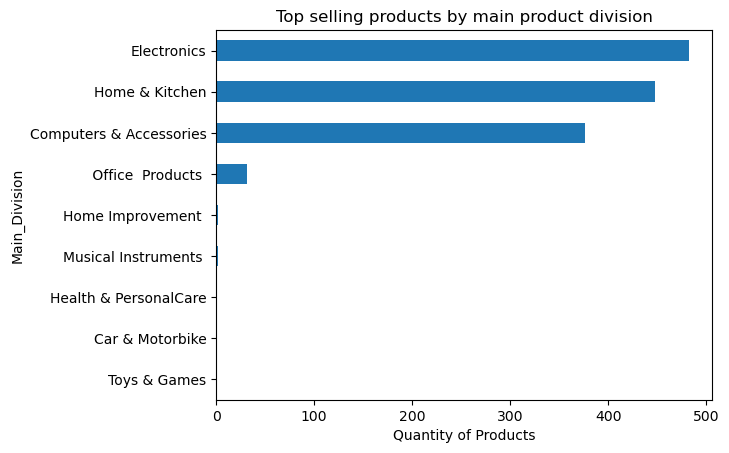

In [104]:
#4.1.1) Analyse the distribution of products by Main_Division

ax1 = df2['Main_Division'].value_counts().sort_values() \
.plot(kind='barh', title = 'Top selling products by main product division')
ax1.set_xlabel('Quantity of Products')
ax1.set_ylabel('Main_Division')


In [105]:
df2['Main_Division'].value_counts()

Electronics                482
Home & Kitchen             448
Computers & Accessories    376
 Office  Products           31
Musical Instruments          2
Home Improvement             2
Toys & Games                 1
Car & Motorbike              1
Health & PersonalCare        1
Name: Main_Division, dtype: int64

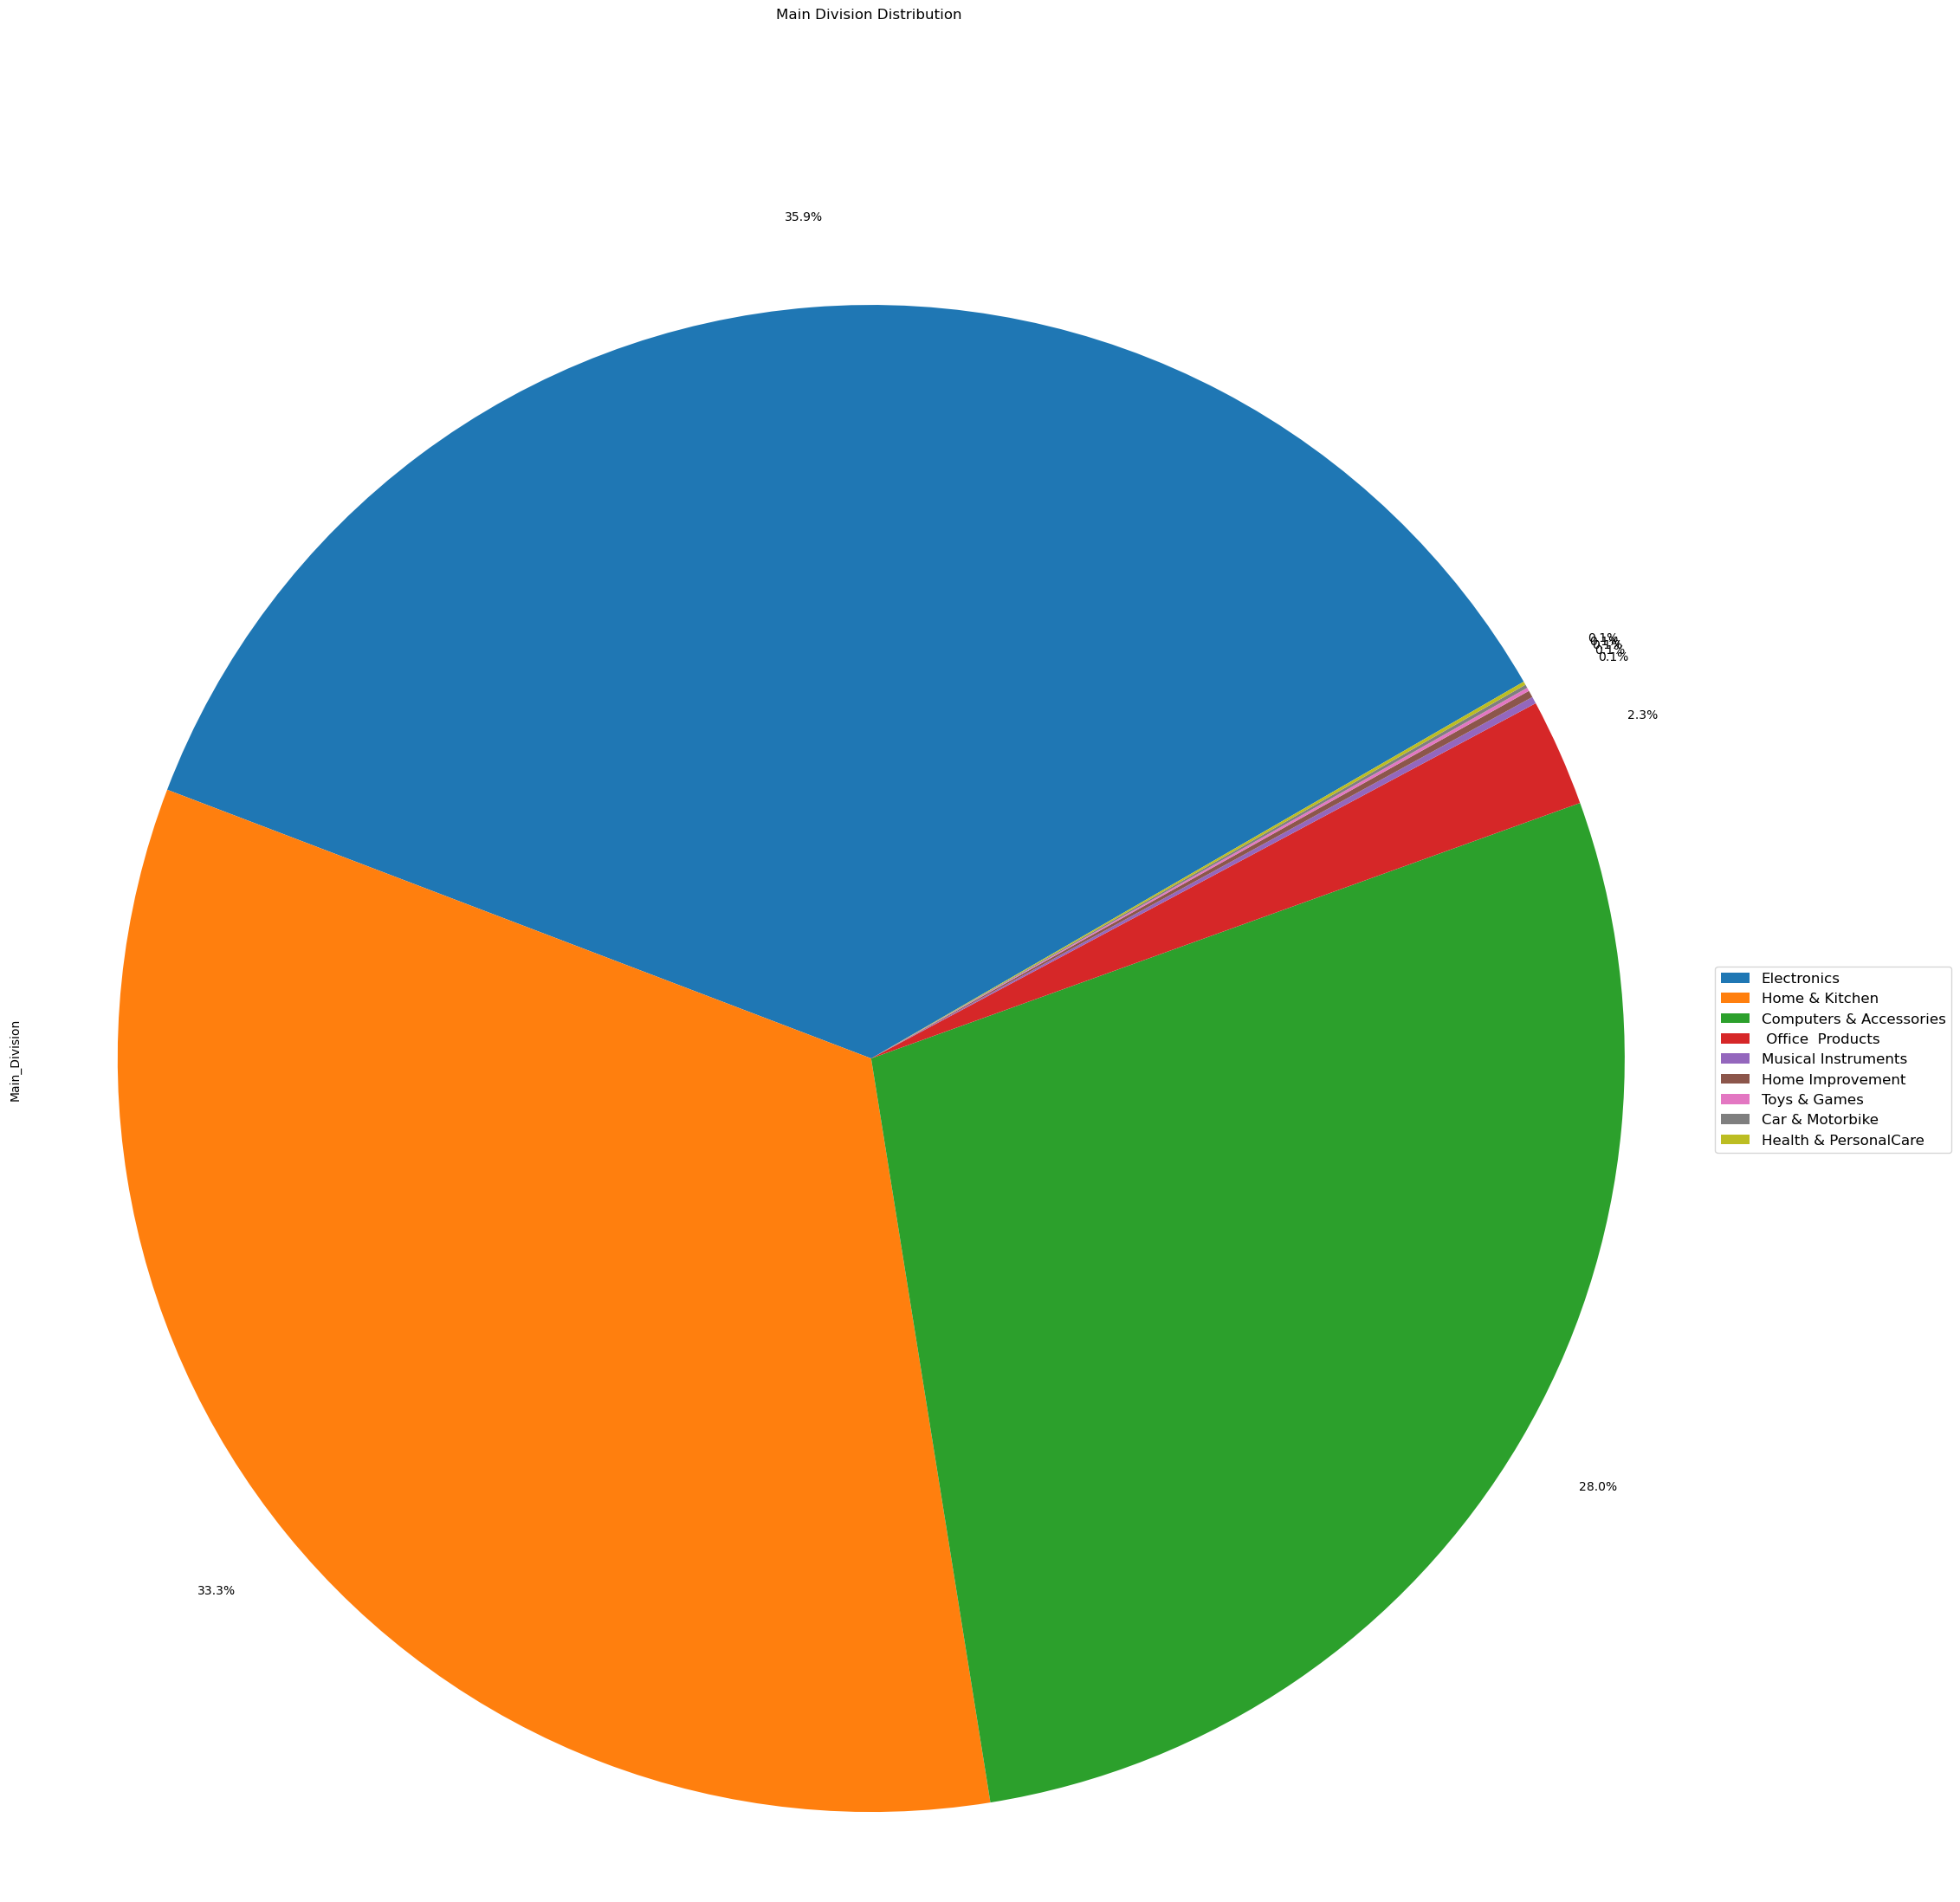

In [106]:
# Pie chart of the distribution
explode = [0.0, 0, 0, 0, 0, 0, 0, 0, 0]
counts = df2['Main_Division'].value_counts()
counts.plot(kind='pie', figsize=(25,25),autopct = '%1.1f%%',
            startangle=30,
            shadow=False, labels=None,pctdistance=1.12,explode=explode)
# scale the title up by 12% to match pctdistance
plt.title('Main Division Distribution',y=1.12)
plt.axis('equal')
plt.legend(labels=counts.index , loc='center left',bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.show()

# Remark

According to the analysis of the product distribution by main division, it has been determined that the Electronic goods division is the most popular among the customers, based on the highest number of sales. The top three selling products belong to the Electronic goods, Home and Kitchen goods, and Computers and Accessories divisions, respectively, with 482, 448, and 376 total sales. These three categories represent 35.9%, 33.3%, and 28.0% of the total products sold, respectively.

On the other hand, the products falling under the Musical Instruments, Home Improvement, Toys & Games, Car & Motorbike, and Health & Personal Care divisions have sold fewer than two items in the market, which suggests that they are not as profitable as the top-selling product categories.

Text(0, 0.5, 'Number of products')

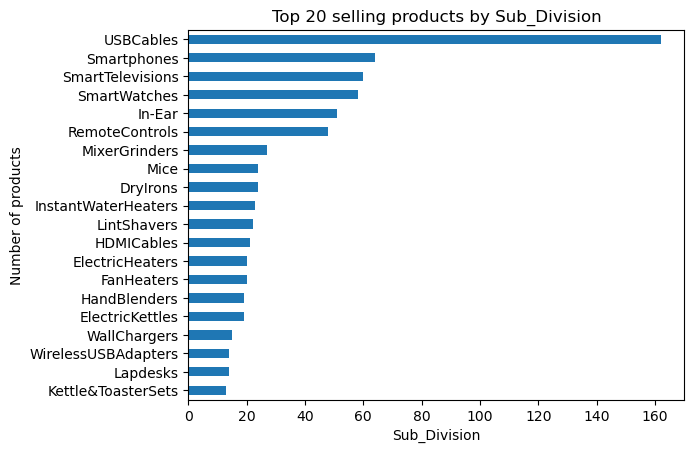

In [107]:
#4.1.2 Analysing the distribution of products by their Sub_Division
ax2 = df2['Sub_Division'].value_counts() \
     .head(20).sort_values()\
     .plot(kind='barh', title='Top 20 selling products by Sub_Division')
ax2.set_xlabel('Sub_Division')
ax2.set_ylabel('Number of products')



In [108]:
df2['Sub_Division'].value_counts()

USBCables             162
Smartphones            64
SmartTelevisions       60
SmartWatches           58
In-Ear                 51
                     ... 
InternalHardDrives      1
WoodenPencils           1
BatteryChargers         1
DataCards&Dongles       1
HandheldBags            1
Name: Sub_Division, Length: 207, dtype: int64

# Remark


After conducting an analysis of the Sub_Division distribution chart, it can be inferred that the most in-demand products on Amazon are USB cables, which account for the highest total sales at 162 units sold. Following USB cables, smartphones, smart televisions, smartwatches, and in-ear devices complete the list of top five best-selling products in descending order of sales volume. It is worth noting that USB cables have sold almost three times more than the second best-selling item, indicating their considerable prevalence among consumers.

Text(0, 0.5, 'Number of products')

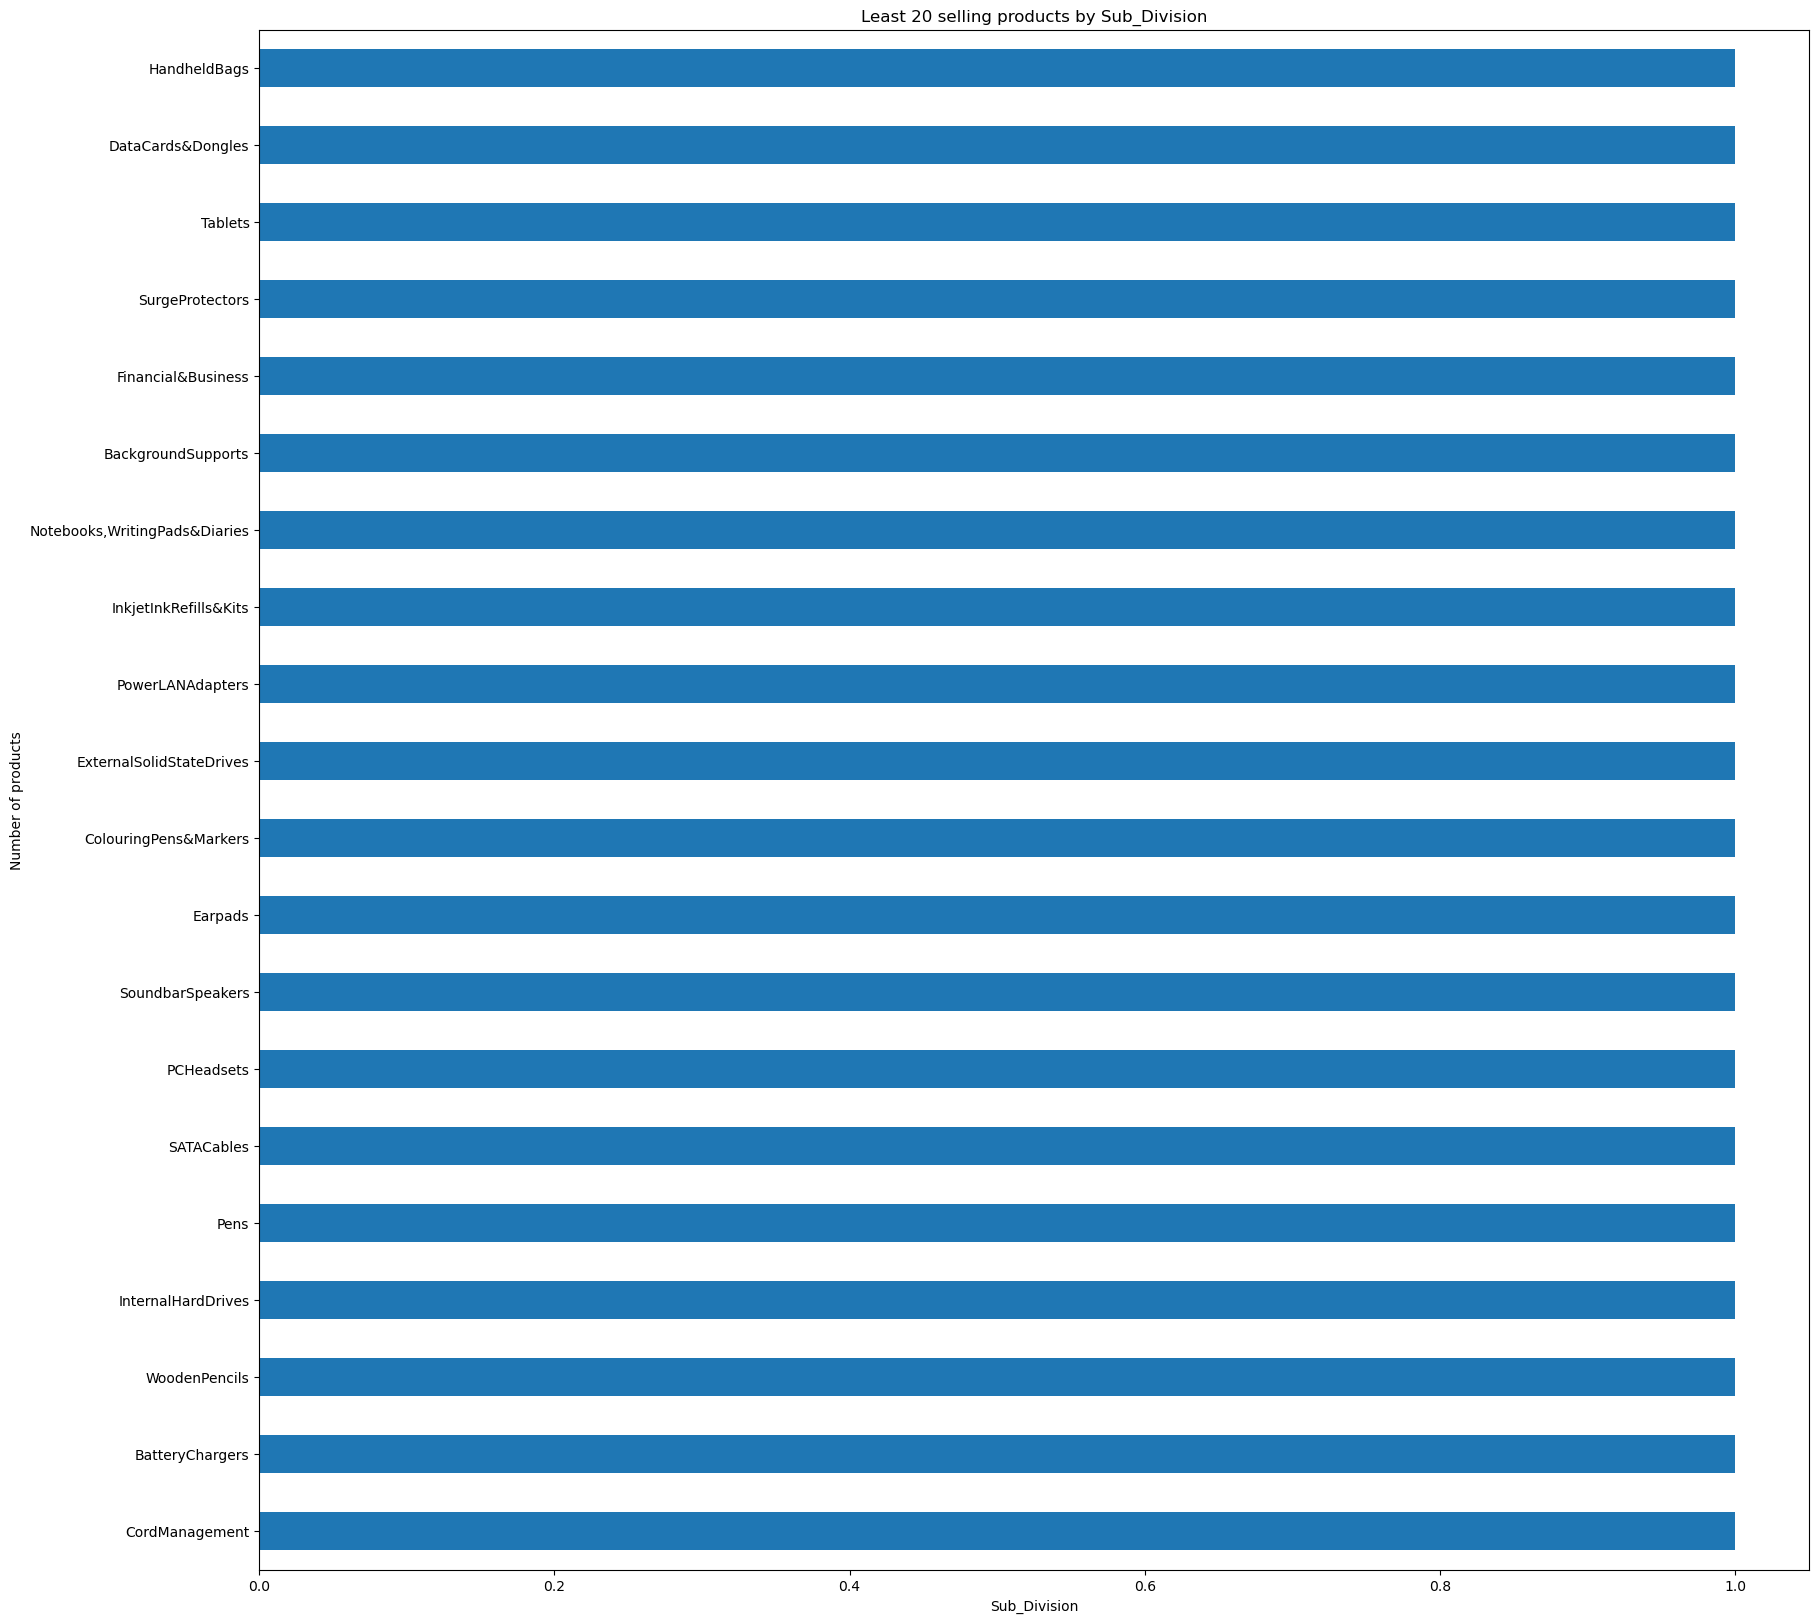

In [109]:
#4.1.2) Analysing the distribution of products by their Sub_Division

ax2 = df2['Sub_Division'].value_counts() \
     .tail(20).sort_values()\
     .plot(kind='barh', title='Least 20 selling products by Sub_Division',figsize = (20,20))
ax2.set_xlabel('Sub_Division')
ax2.set_ylabel('Number of products')



In [110]:
# Idea* : Find the percentage of products with less than 2 items sold.

In [111]:
# Get the value counts of the 'Sub_Division' column
sub_division_counts = df2['Sub_Division'].value_counts()

# Create a new dataframe from the value counts and reset the index
sub_division_df = pd.DataFrame({'Sub_Division': sub_division_counts.index,'Count': sub_division_counts.values})
#print the new dataframe
print(sub_division_df )

           Sub_Division  Count
0             USBCables    162
1           Smartphones     64
2      SmartTelevisions     60
3          SmartWatches     58
4                In-Ear     51
..                  ...    ...
202  InternalHardDrives      1
203       WoodenPencils      1
204     BatteryChargers      1
205   DataCards&Dongles      1
206        HandheldBags      1

[207 rows x 2 columns]


# Remark

The chart analysis reveals that a considerable amount of data can be classified as having the least sales. Numerous products within the Sub_Division category have sold less than two units, indicating that a significant proportion of products may not be profitable. In particular, it can be inferred that 51.69% of all products sold on Amazon fall under the category of unprofitable products, as they have sold less than two units. 

In [112]:
#sub_division_df['Category'] = sub_division_df['Count'].apply(lambda x: 'Equal to 1 item' if x == 1 else
#                                                            ('More than 2 items but less than 100' if x < 100 else
#                                                            ('More than 100 items but less than 200' if x < 200 else 'More than 200 items')))
#
#print(sub_division_df)

5.) Data visualisation 

Data visualization is the practice of presenting data and information in a graphical or visual format that can be easily understood and interpreted. It is an important tool for communicating complex information and relationships, as well as identifying patterns, trends, and outliers within large datasets. By converting data into a visual format, such as charts, graphs, maps, and other visualizations, it becomes more accessible, intuitive, and impactful for audiences. Data visualization can be used in various fields, including business, science, healthcare, education, and journalism, to aid in decision-making, problem-solving, and storytelling.








A histogram can offer several types of information about a dataset:

The overall shape of the distribution: Histograms can reveal whether the distribution is symmetric, skewed to the left or right, or bimodal.

The central tendency: Histograms can show the location of the peak of the distribution, which may indicate the central tendency of the data.

The spread or variability: Histograms can provide an idea of how spread out the data is or how much variability there is.

Outliers: Histograms can help identify potential outliers, which are observations that fall far outside the rest of the data.

Gaps or unusual patterns: Histograms can reveal any unusual patterns or gaps in the data that may need further investigation.

Overall, histograms are a useful tool for quickly summarising the distribution of a dataset and identifying any patterns or outliers that may be present.

Text(0.5, 0, 'Ratings across all categories')

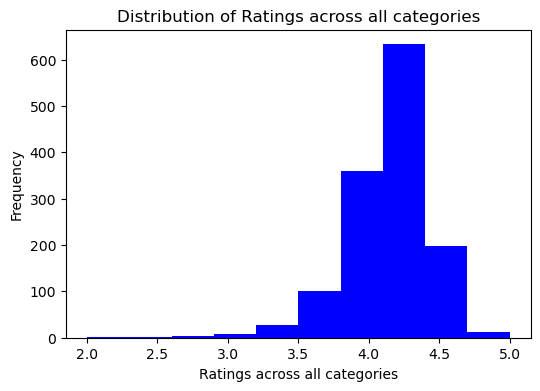

In [113]:
#5.1) Analyse the distribution of the product ratings 

ax4 = df2['Rating'] \
     .plot(kind='hist', title='Distribution of Ratings across all categories', figsize = (6,4), color = 'blue')
ax4.set_xlabel('Ratings across all categories')



when creating a histogram plot in Matplotlib, it automatically groups data into bins based on a default bin size,which can result in multiple categories being lumped together. As a result, the frequency count displayed on the histogram represents a range of categories rather than individual categories. For example, a frequency count of (4.1 - 4.5) indicates the number of observations that fall within a range of categories from 4.1 to 4.5 rather than the count for a single category.


Text(0.5, 0, 'Ratings across all categories')

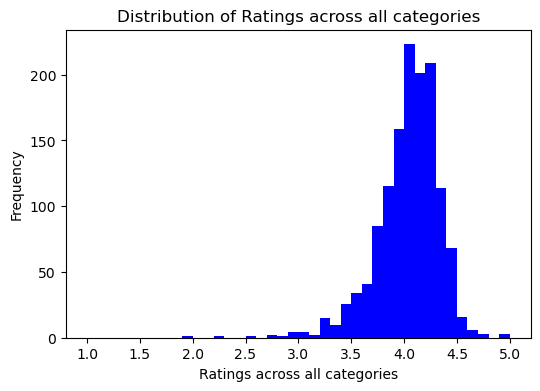

In [114]:
ax4 = df2['Rating'] \
     .plot(kind='hist', title='Distribution of Ratings across all categories', figsize = (6,4), color = 'blue', bins=np.arange(1,5.1,0.1))
ax4.set_xlabel('Ratings across all categories')

Upon examining the histogram plot of the rate distribution, it is clear that the product ratings are positively skewed, indicating that the majority of products have received a rating greater than 4.0. This skewness suggests a high level of customer satisfaction with the goods and services provided by Amazon. In general, a rating of 3.5 can be considered satisfactory, while products with ratings below 3.0 are likely to have faults and can be considered outliers. From the histogram plot, it can be seen that there are only a limited number of outlier ratings, indicating that certain products require further improvements. These products will be identified later in the notebook.

Text(0, 0.5, 'Quantity of products rated')

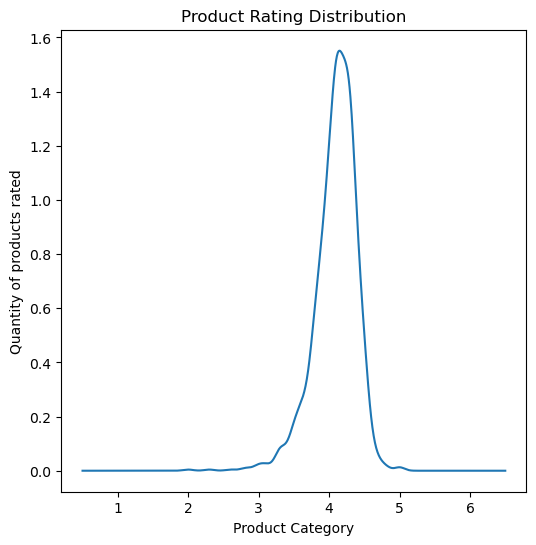

In [115]:
# 5.2) Settting up the density plot of the distribution of ratings
ax5 = df2['Rating']. \
    plot(kind='kde', figsize=(6,6), title='Product Rating Distribution')
    
ax5.set_xlabel('Product Category')
ax5.set_ylabel('Quantity of products rated')


In [116]:
# 5.3) Find the percentage of items in Sub_Division with less than 2 items sold.

df2.query('Rating == 2.0')

,Product_Id,Product_Name,Category,Discounted_Price,Actual_Price,Discount_Percentage,Rating,Rating_Count,User_Name,Main_Division,Sub_Division
1188,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299.0,2495.0,48,2.0,2.0,"Manidipa Sengupta,Vidisha",Home & Kitchen,FanHeaters


In [117]:
percent_single = (sub_division_counts <= 2).sum() / len(sub_division_counts) * 100
print(f"Percentage of items with a count less than 2: {percent_single: .2f}%")

Percentage of items with a count less than 2:  51.69%


In [118]:
#5.4) Find the Main Division with the most number of discounts
Most_Discounted_Product = df2.groupby('Main_Division')['Discounted_Price'].count().sort_values(ascending=False)
print(Most_Discounted_Product)

Main_Division
Electronics                482
Home & Kitchen             448
Computers & Accessories    376
 Office  Products           31
Home Improvement             2
Musical Instruments          2
Car & Motorbike              1
Health & PersonalCare        1
Toys & Games                 1
Name: Discounted_Price, dtype: int64


Upon analysis, it is apparent that the Electronic division offers the greatest number of products with discounts,this trend appears to correspond with the pattern of the highest number of products sold by category. Notable all products across the different categories have some form of discount, which would make it difficult to determine whether discounts have an impact on the number of items sold for any particular category. This observation will be further examined using a correlation plot to establish any potential relationship between the variables.


In [119]:
#df2.groupby('Main_Division')['Rating'].count().sort_values(ascending=False)

Each and every product had a rating, this information is not needed because we made sure that there were no missing data values in the dataframe during the cleaning process.

<AxesSubplot:title={'center':'Distribution of rating count'}, xlabel='Rating'>

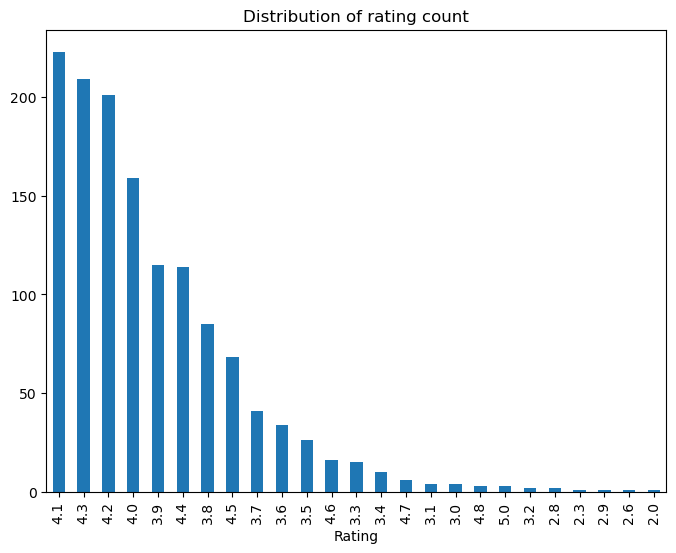

In [120]:
# 5.5) Distribution of rating count according to customer rating score

ax = rating_count = df2.groupby('Rating')['Main_Division'].count().sort_values(ascending=False)
ax.plot(kind = 'bar',title = 'Distribution of rating count', figsize = (8,6))


In [121]:
rating_count = df2.groupby('Rating')['Main_Division'].count().sort_values(ascending=False)
print(rating_count)

Rating
4.1    223
4.3    209
4.2    201
4.0    159
3.9    115
4.4    114
3.8     85
4.5     68
3.7     41
3.6     34
3.5     26
4.6     16
3.3     15
3.4     10
4.7      6
3.1      4
3.0      4
4.8      3
5.0      3
3.2      2
2.8      2
2.3      1
2.9      1
2.6      1
2.0      1
Name: Main_Division, dtype: int64


The mode rating is 4.1 with a frequency of 223, however when compared to plot ax4, we see that the frequency for rating count of 4.1 is 600. This is unusual.What caused this discrepancy?

There are a few potential reasons why the frequency count shown on the graph (600) does not match the actual frequency count (223) for the rating of 4.1:

Binning: The plot function in pandas uses a default binning strategy to create the histogram. This means that it groups the ratings into ranges (called "bins") and counts the number of ratings falling within each bin. It's possible that the default bin size used by the plot function is too large, causing the ratings to be grouped together in a way that obscures the actual frequency count of ratings like 4.1.

Data manipulation: It's possible that the data was manipulated in some way (e.g., by rounding the ratings to the nearest tenth) before being passed to the plot function. This could result in ratings like 4.1 being over-represented in the data, leading to a higher frequency count on the graph.



In [122]:
#5.6) Find the maximum discounted price

max_discount = df2['Discounted_Price'].max()

# Filter the dataframe to only include rows with the maximum discounted price
max_discount_rows = df2[df2['Discounted_Price'] == max_discount]

# Get the product name(s) from the filtered rows
product_names = max_discount_rows['Product_Name'].values

# Print the product name(s) with the highest discount
print(f"The product(s) with the highest discount is/are: {product_names}")


The product(s) with the highest discount is/are: ['Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)']


In [123]:
# Group the data by Product_Name and calculate the mean of the Discount_Percentage column for each product
discounted_products = df2.groupby('Product_Name')['Discount_Percentage'].mean()

# Sort the discounted_products Series in descending order
discounted_products = discounted_products.sort_values(ascending=False)

# Select the top 10 products with the highest average discount percentage
top_10_discounted_products = discounted_products.head(10)

# Print the top 10 discounted products
print(top_10_discounted_products)

Product_Name
rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver    94.0
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                           91.0
Sounce Spiral Charger Cable Protector Data Cable Saver Charging Cord Protective Cable Cover Headphone MacBook Laptop Earphone Cell Phone Set of 3 (Cable Protector (12 Units))                      90.0
LAPSTER 12pcs Spiral Cable Protectors for Charger, Wires, Data Charger Cable Protector for Computers, Cell Phones etc.(Grey)                                                                        90.0
LAPSTER Spiral Charger Spiral Charger Cable Protectors for Wires Data Cable Saver Charging Cord Protective Cable Cover Set of 3 (12 Pieces)                                            

Based on the information presented in the graph, it can be confidently stated that retailers specializing in USB cables provided the highest number of discounts compared to those offering other products across all categories.

<AxesSubplot:xlabel='Sub_Division'>

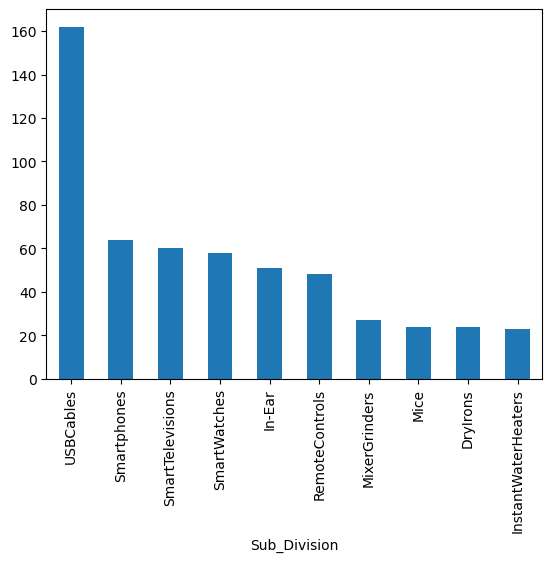

In [124]:
#5.7) Which sub division had the most discounted products.

most_discounts_cat = df2.groupby('Sub_Division')['Discounted_Price'].count().sort_values(ascending=False) 
most_discounts_cat.head(10)\
.plot(kind='bar')

In [125]:
#5.8) Visualise the relationship between rating and actual price
df2.head()

,Product_Id,Product_Name,Category,Discounted_Price,Actual_Price,Discount_Percentage,Rating,Rating_Count,User_Name,Main_Division,Sub_Division
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",Computers & Accessories,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",Computers & Accessories,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...",Computers & Accessories,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",Computers & Accessories,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",Computers & Accessories,USBCables


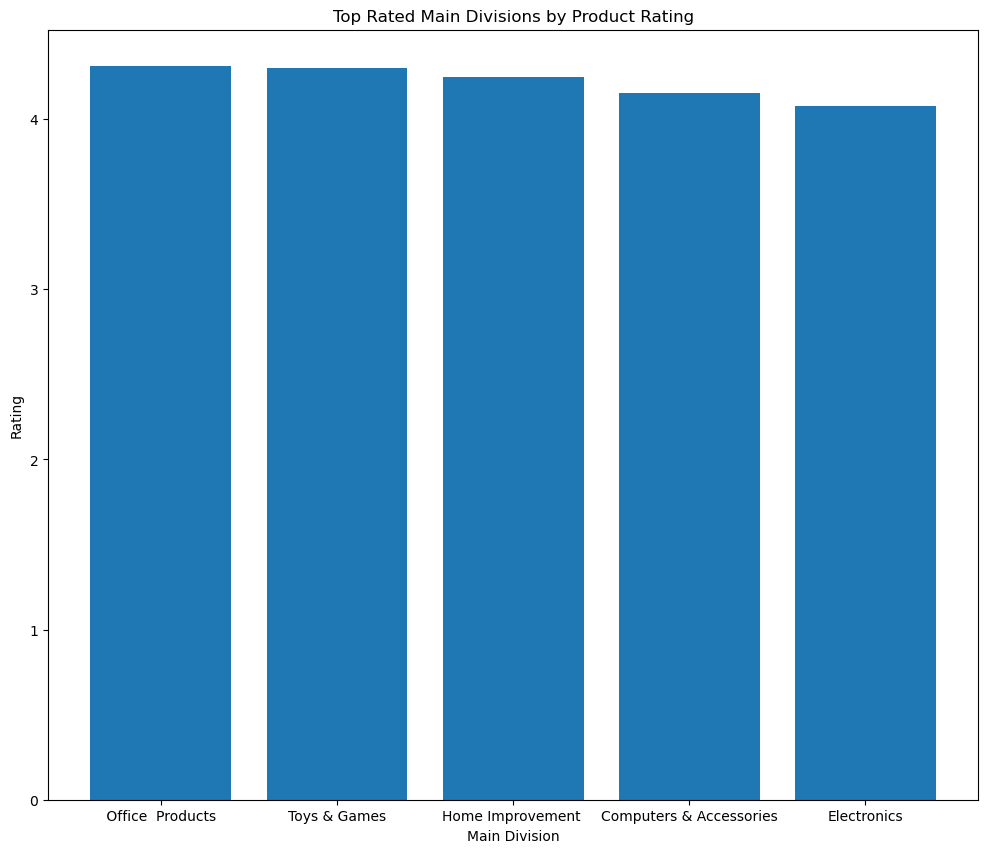

In [126]:

# Group the data by main division and calculate the average rating for each division

top_rate = df2.groupby('Main_Division')['Rating'].mean().sort_values(ascending=False).head(5).reset_index()

# Set the figure size and create a bar plot to display the results
plt.figure(figsize=(12, 10))
plt.bar(x=top_rate['Main_Division'], height=top_rate['Rating'])

# Set the x and y axis labels, as well as the title of the plot
plt.xlabel('Main Division')
plt.ylabel('Rating')
plt.title('Top Rated Main Divisions by Product Rating')

# Display the plot
plt.show()

In [127]:
rank = df2.groupby('Main_Division')['Rating'].mean().sort_values(ascending=False).reset_index()
print(rank)

             Main_Division    Rating
0        Office  Products   4.309677
1             Toys & Games  4.300000
2        Home Improvement   4.250000
3  Computers & Accessories  4.153191
4              Electronics  4.075519
5           Home & Kitchen  4.040848
6    Health & PersonalCare  4.000000
7     Musical Instruments   3.900000
8          Car & Motorbike  3.800000


Based on the aggregated mean, it is observed that the Office Products category has the highest average rating of 4.31, indicating that the majority of office products sold have received a high rating from customers. This suggests that customers are satisfied with the range of office products available online and are likely to make future purchases. Conversely, the Car & Motorbike category has the lowest mean rating of 3.8, implying that a lower proportion of products in this category were appreciated by customers. While customers may still be somewhat satisfied with these products when purchased online, they may explore alternative options elsewhere due to some level of dissatisfaction.

In [128]:
df2.columns

Index(['Product_Id', 'Product_Name', 'Category', 'Discounted_Price',
       'Actual_Price', 'Discount_Percentage', 'Rating', 'Rating_Count',
       'User_Name', 'Main_Division', 'Sub_Division'],
      dtype='object')

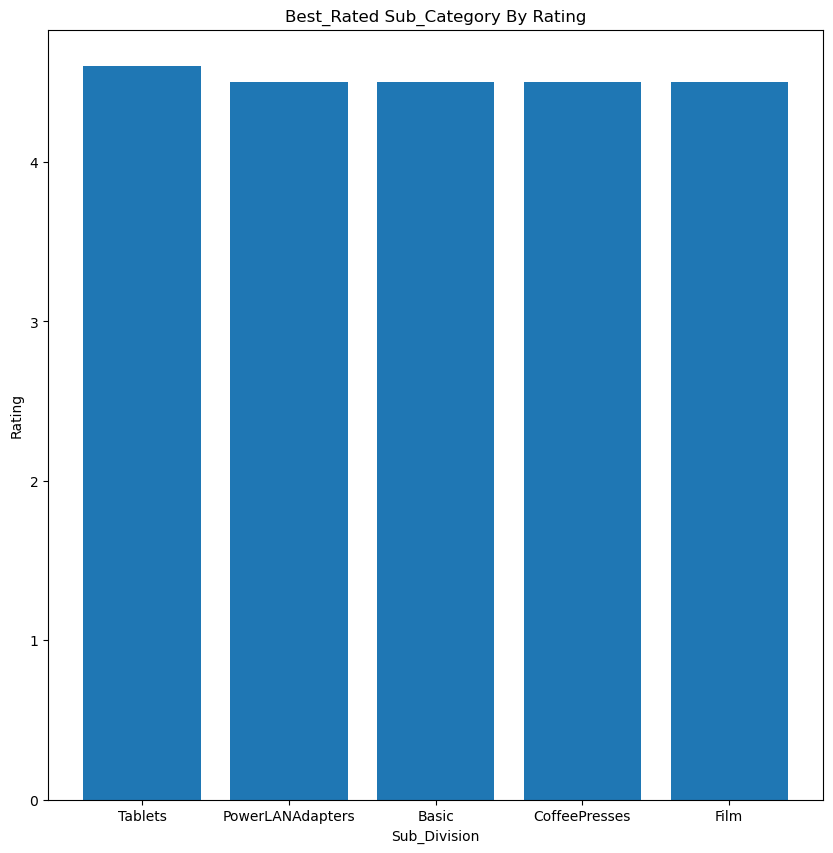

In [129]:
# 5.9) Visualise Top Rated Sub Division by Product Rating
best_rated = df2.groupby(['Sub_Division'])['Rating'].mean().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(10,10))

plt.bar(best_rated['Sub_Division'], best_rated['Rating'])
plt.xlabel('Sub_Division')
plt.ylabel('Rating')
plt.title('Best_Rated Sub_Category By Rating')

plt.show()

In [130]:
rank= df2.groupby('Sub_Division')['Rating'].mean().sort_values(ascending=False).reset_index()
print(rank)

         Sub_Division  Rating
0             Tablets     4.6
1    PowerLANAdapters     4.5
2               Basic     4.5
3       CoffeePresses     4.5
4                Film     4.5
..                ...     ...
202    InkjetPrinters     3.6
203        PCHeadsets     3.5
204         3DGlasses     3.5
205        DustCovers     3.4
206  ElectricGrinders     3.3

[207 rows x 2 columns]


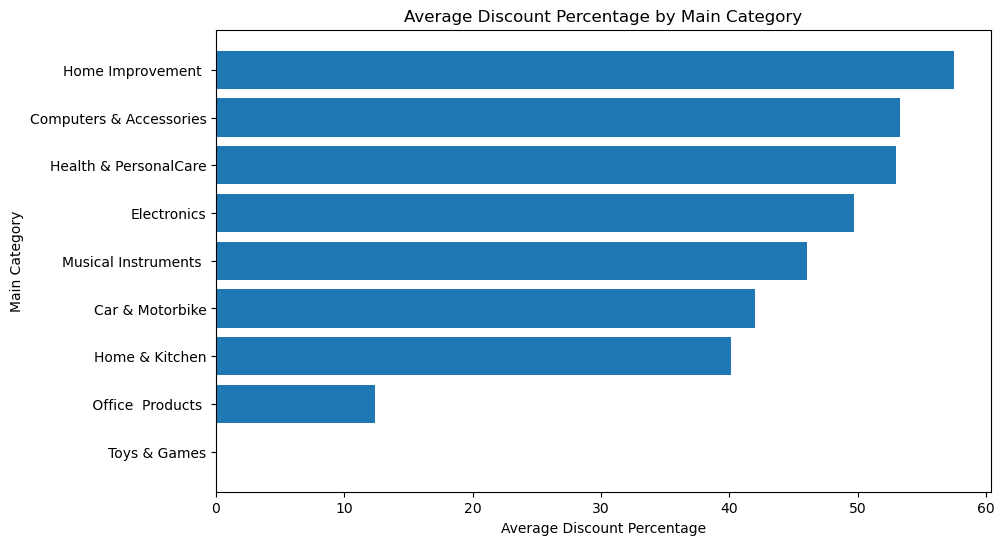

In [131]:
# 6.0) Calculate the average discount percentage for each main category

discount_main_cat = df2.groupby('Main_Division')['Discount_Percentage'].mean().reset_index()

discount_main_cat = discount_main_cat.sort_values(by='Discount_Percentage', ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(discount_main_cat['Main_Division'], discount_main_cat['Discount_Percentage'])
ax.set_xlabel("Average Discount Percentage")
ax.set_ylabel('Main Category')
ax.set_title('Average Discount Percentage by Main Category')

plt.show()

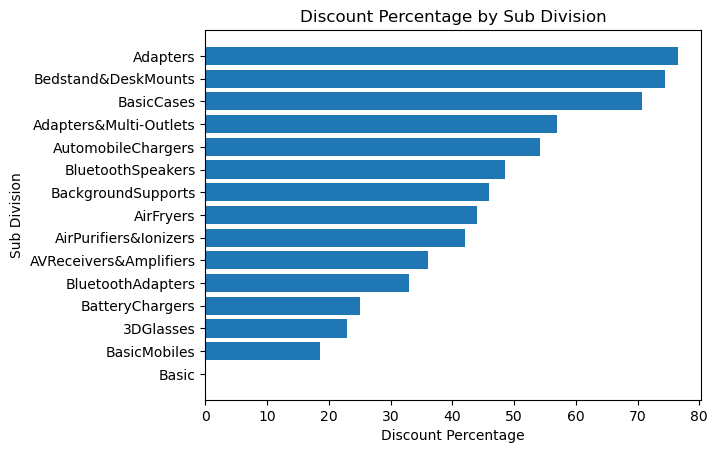

In [132]:
mean_discount_by_sub_division = df2.groupby('Sub_Division')['Discount_Percentage'].mean().head(15)
mean_discount_by_sub_division = mean_discount_by_sub_division.sort_values(ascending=True)

plt.barh(mean_discount_by_sub_division.index, mean_discount_by_sub_division.values)
plt.title('Discount Percentage by Sub Division')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Division')
plt.show()

In [133]:
table = pd.DataFrame({'Sub Division': mean_discount_by_sub_division.index,'Mean Discount Percentage': 
                      mean_discount_by_sub_division.values})

print(table)

              Sub Division  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                 18.555556
2                3DGlasses                 23.000000
3          BatteryChargers                 25.000000
4        BluetoothAdapters                 33.000000
5   AVReceivers&Amplifiers                 36.000000
6    AirPurifiers&Ionizers                 42.000000
7                AirFryers                 44.000000
8       BackgroundSupports                 46.000000
9        BluetoothSpeakers                 48.500000
10      AutomobileChargers                 54.250000
11  Adapters&Multi-Outlets                 57.000000
12              BasicCases                 70.750000
13     Bedstand&DeskMounts                 74.500000
14                Adapters                 76.500000


# Remark

The bar chart indicates that adapters have the highest number of discounts among all the categories, with an average discount rate of 76.5%. On the other hand, Basic products have no discounts on the items sold, making it the category with the least amount of discounts.

Data correlation visualization is a technique used in data analysis to explore the relationship between two or more variables in a dataset. The goal is to identify patterns, trends, and associations between variables that can provide insight into the underlying data.

There are several types of data correlation visualization techniques, including scatter plots, heat maps, correlation matrices, and bubble charts. Scatter plots are a common technique where each data point is represented as a point on a graph, with one variable on the x-axis and the other on the y-axis. The shape and distribution of the points can reveal the strength and direction of the correlation between the variables.

Heat maps and correlation matrices use color coding to indicate the strength and direction of the correlation between variables. Heat maps display this information in a grid format, while correlation matrices display it in a table format.

Bubble charts use circles to represent data points, with the size and position of the circles indicating the values of the variables being compared. This technique can be useful for visualizing correlations between multiple variables at once.

Overall, data correlation visualization is an important tool for identifying relationships between variables in a dataset, which can help inform decision-making and further analysis.

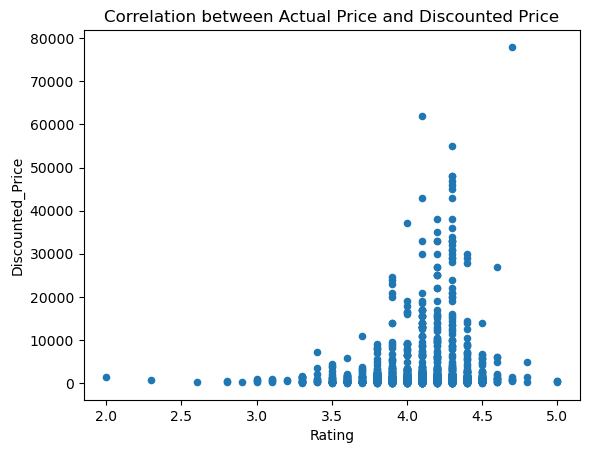

In [134]:
#6.1) Visualisation of correlation between Actual Price and Discounted Price

fig, ax = plt.subplots()
df2.plot(kind='scatter', x='Rating', y='Discounted_Price', ax=ax)
ax.set_title('Correlation between Actual Price and Discounted Price')
plt.show()

In [135]:
df_corr = df2.select_dtypes(exclude=['object', 'category']).dropna().corr()
df_corr.head()

,Discounted_Price,Actual_Price,Discount_Percentage,Rating,Rating_Count
Discounted_Price,1.000000,0.965451,-0.234755,0.127339,-0.025779
Actual_Price,0.965451,1.000000,-0.119139,0.125985,-0.035636
Discount_Percentage,-0.234755,-0.119139,1.000000,-0.167222,0.006763
Rating,0.127339,0.125985,-0.167222,1.000000,0.098007
Rating_Count,-0.025779,-0.035636,0.006763,0.098007,1.000000


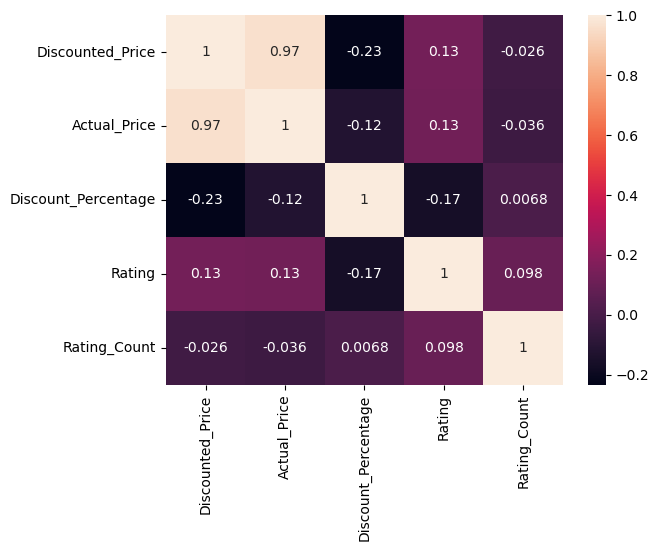

<Figure size 800x600 with 0 Axes>

In [136]:
sns.heatmap(df_corr, annot=True)
plt.figure(figsize=(8, 6))
plt.show()

# Remark

It seems that there is a strong correlation between the variables 'Discount_Price' and 'Actual_Price', with a correlation coefficient of 0.97. However, there is little to no correlation observed among the other categories outside of these variables.

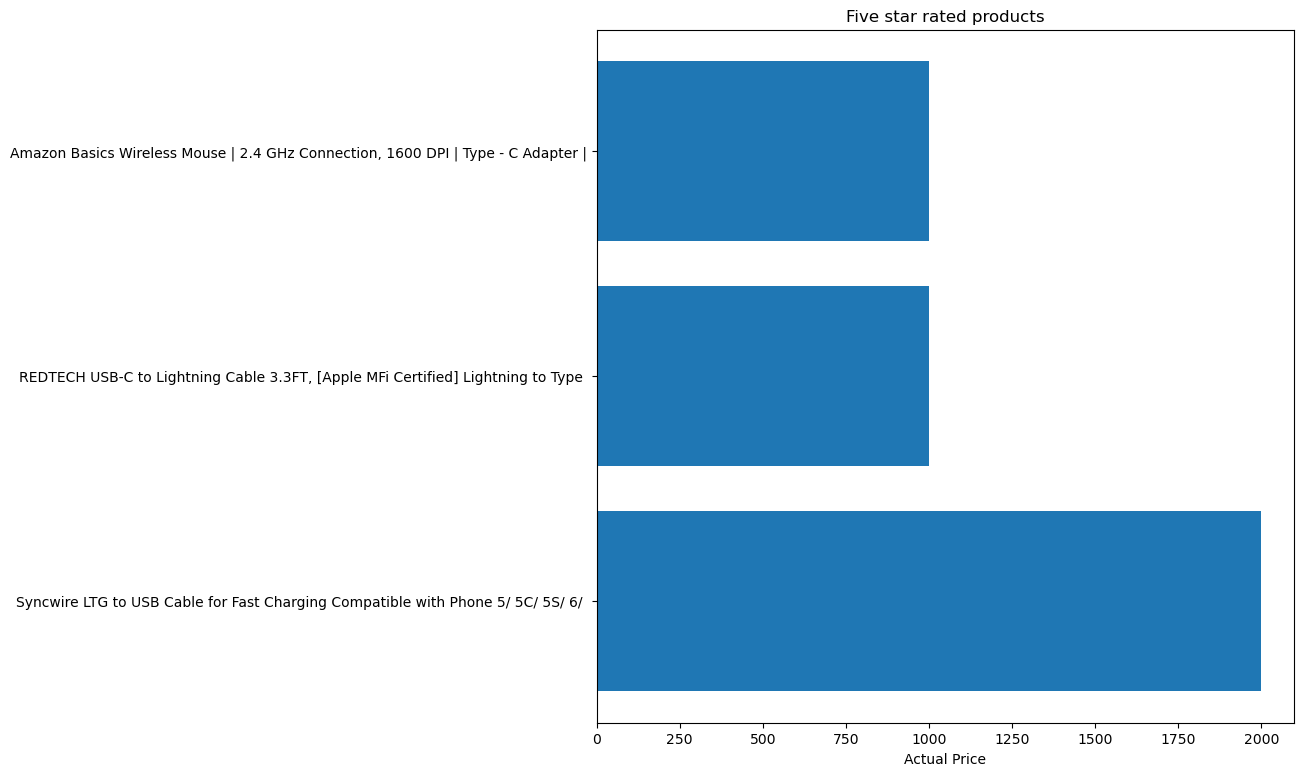

In [137]:
# 6.2) Identify five star rated products and their actual price

five_star_rated = df2.query('Rating == 5')

fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(y=five_star_rated['Product_Name'].str[:80], width=five_star_rated['Actual_Price'])
ax.set_title("Five star rated products")
ax.set_xlabel("Actual Price")

plt.show()

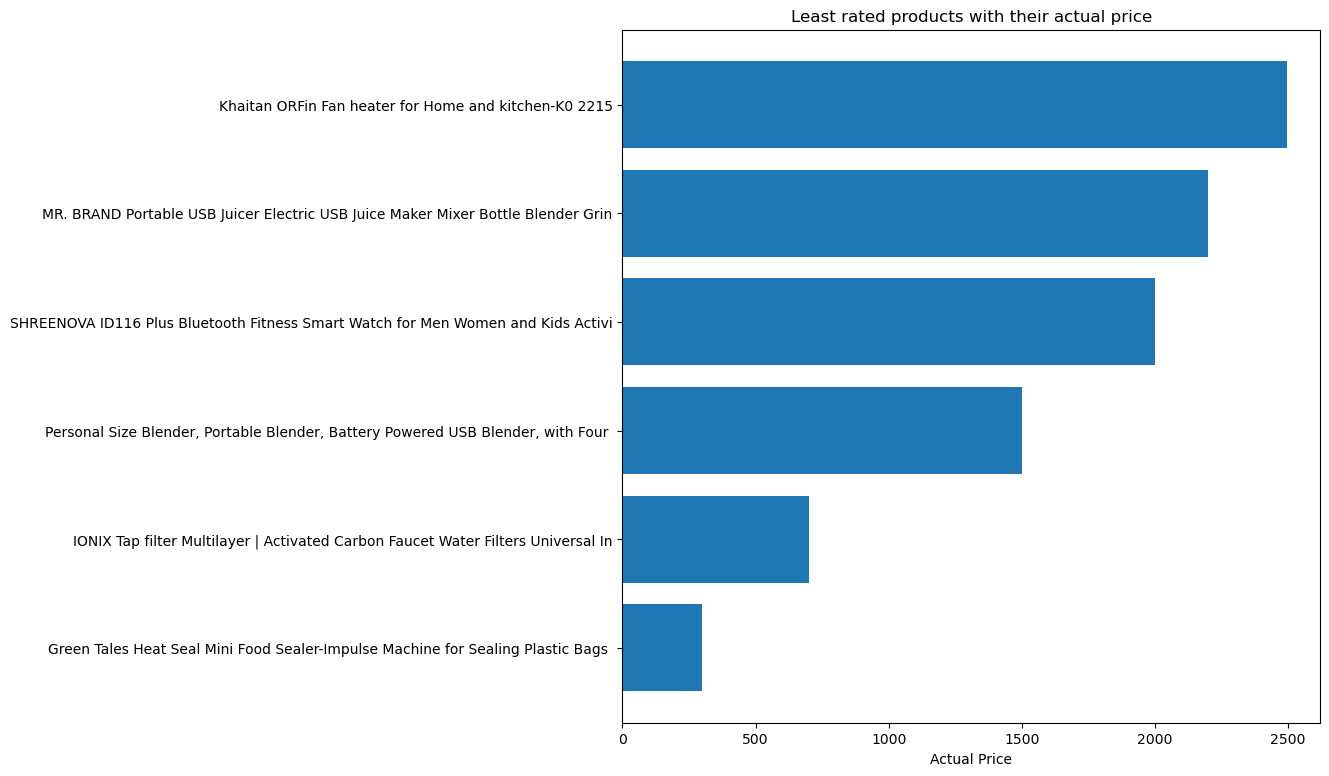

In [138]:
# Let's assume any product with a rating less than three is below average..
least_product_rating = df2.query("Rating < 3").sort_values(by='Actual_Price')

fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(y=least_product_rating['Product_Name'].str[:80], width=least_product_rating['Actual_Price'])
ax.set_title("Least rated products with their actual price")
ax.set_xlabel("Actual Price")

plt.show()


In [139]:
# Distribution of rating score:

rating_score = []
for score in df2['Rating']:
    if score < 2.0:
        rating_score.append('Poor')
    elif score < 3.0:
        rating_score.append('Below Average')
    elif score < 4.0:
        rating_score.append('Average')
    elif score < 5.0:
        rating_score.append('Above Average')
    elif score == 5.0:
        rating_score.append('Excellent')

In [140]:
df2['rating_score'] = rating_score

df2['rating_score'] = df2['rating_score'].astype('category')

In [141]:
rating_score = df2['rating_score'].value_counts().reindex(index = ['Below Average', 'Average', 'Above Average', 'Excellent']). \
rename_axis('rating_score').reset_index(name='counts')

rating_score

,rating_score,counts
0,Below Average,6
1,Average,336
2,Above Average,999
3,Excellent,3


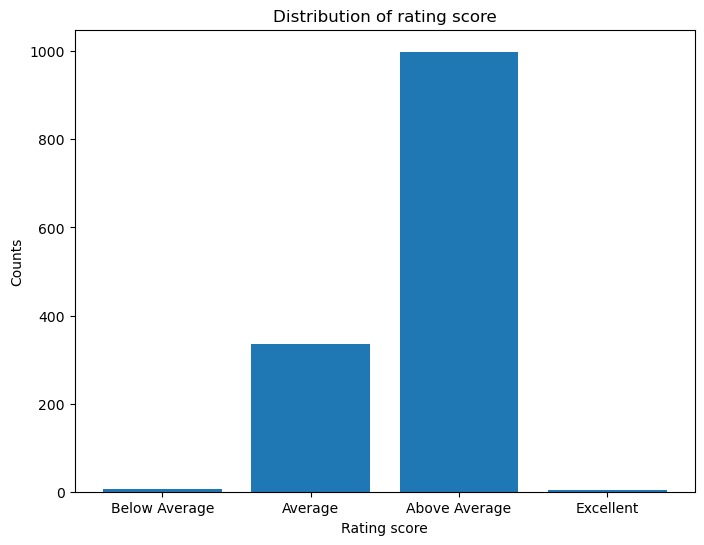

In [142]:
# Distribution of rating score

ax = plt.subplots(figsize=(8, 6))[1]
ax.bar(x=rating_score['rating_score'], height=rating_score['counts'])
ax.set_title('Distribution of rating score')
ax.set_xlabel('Rating score')
ax.set_ylabel('Counts')

plt.show()
    

# Conclusion

During this exercise, we had the opportunity to explore various concepts and tools that are valuable in the field of data analysis. We practiced applying methods such as data cleaning and exploratory data analysis, utilising a range of statistical charts and models to obtain valuable insights from an Amazon sales dataset.


Numerous insights were uncovered through the analysis, although we will highlight three critical findings.

Firstly, it was observed that more than 50% of the products available on Amazon were unprofitable, with a noteworthy 51.69% of these products only selling one unit over the period analysed. We suggest that increased advertising efforts be made to raise awareness among customers about these products.

The second significant finding is that the electronics category is the most popular and accounts for 48% of all sales products. It is suggested that offering customers more variety of electronic products would provide greater value and incentivise them to return for future purchases.

The ultimate significant finding is that a particular product, identified by the product ID: B0BPJBTB3F, received the lowest rating of 2.0. As a result, we suggest that the product be evaluated and, if feasible, be excluded from the Amazon marketplace.

# Limitations

There are two primary limitations associated with this project. Firstly, although the dataset is large, certain columns that could have provided valuable insights were removed for the sake of simplicity and time constraints, such as the product_review column. This column, if included, would have offered clearer insights into why a particular product with the ID B0BPJBTB3F received a low rating. Such insights could have been useful in improving customer satisfaction and product ratings.

Secondly, the technical nature of this project could make it challenging for individuals without a relevant background to interpret the data. This is due to the limited use of graphics and imagery, which could have made the data more accessible and easier to understand. In future projects, incorporating more graphical representations and statistical models could be helpful in making the data more digestible and comprehensible for a broader audience.

# Acknowledgment

As a beginner in this project, two reputable sources were referenced, to whom appreciation is extended for their commendable work. Without their contributions, completing the project would have been difficult. Gratitude is expressed to Saba Rostami (Kaggle) at https://www.kaggle.com/code/sabarostami/amazon-sales/notebook and FLAVIO QUARESMA (Kaggle) at https://www.kaggle.com/code/flavioquaresma/amazon-product-analysis-recommendation-system.